# Understanding Distributions Through Sampling



Create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.

Text(15.492263095088692, 0.5, 'x4\nUniform')

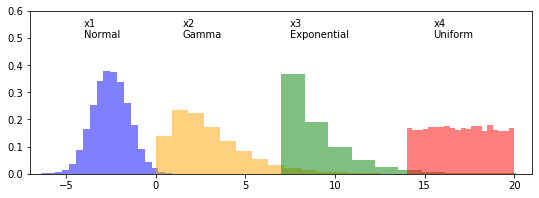

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5, color='blue')
plt.hist(x2, density=True, bins=20, alpha=0.5, color='orange')
plt.hist(x3, density=True, bins=20, alpha=0.5, color='green')
plt.hist(x4, density=True, bins=20, alpha=0.5, color='red');
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

### Exercise on pyplots subplots:

Text(16, 0.32, 'x4\nUniform')

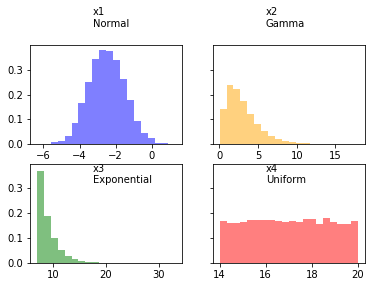

In [2]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharey=True)

ax1.hist(x1, density=True, bins=20, alpha=0.5, color='blue')
ax2.hist(x2, density=True, bins=20, alpha=0.5, color='orange')
ax3.hist(x3, density=True, bins=20, alpha=0.5, color='green')
ax4.hist(x4, density=True, bins=20, alpha=0.5, color='red')

plt.text(8.5, 0.95, 'x1\nNormal')
plt.text(16, 0.95, 'x2\nGamma')
plt.text(8.5, 0.32, 'x3\nExponential')
plt.text(16, 0.32, 'x4\nUniform')

### Exercise on gridspec:

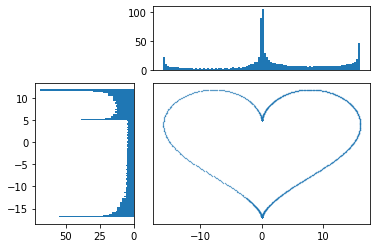

In [3]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

t = np.arange(0, 10, 0.01)
Y = 13*np.cos(t) - 5*np.cos(2*t) - 2*np.cos(3*t) - np.cos(4*t)
X = 16*np.sin(t)**3
lower_right.scatter(X, Y, s=0.1)
lower_right.tick_params(left=False, labelleft=False)
top_histogram.hist(X, bins=100)
top_histogram.tick_params(bottom=False, labelbottom=False)
side_histogram.hist(Y, bins=100, orientation='horizontal')
side_histogram.invert_xaxis()

### Exercise on animation:

<IPython.core.display.Javascript object>


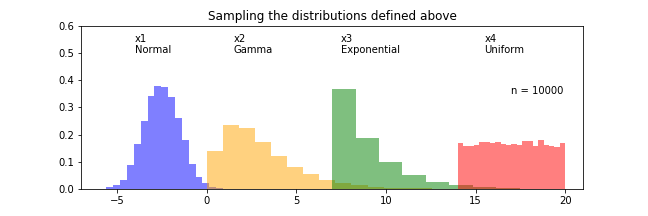

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

n = 10000

def update(curr):
    if curr*100 == n:
        a.event_source.stop()
    plt.cla()
    plt.hist(x1[:curr*100], density=True, bins=20, alpha=0.5, color='blue')
    plt.hist(x2[:curr*100], density=True, bins=20, alpha=0.5, color='orange')
    plt.hist(x3[:curr*100], density=True, bins=20, alpha=0.5, color='green')
    plt.hist(x4[:curr*100], density=True, bins=20, alpha=0.5, color='red');
    plt.axis([-7,21,0,0.6])
    
    plt.gca().set_title('Sampling the distributions defined above')
    plt.annotate('n = {}'.format(curr*100), [17,0.35])
    
    plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
    plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
    plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
    plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')
    

fig = plt.figure(figsize=(9,3))
a = animation.FuncAnimation(fig, update, interval=100)